In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import librosa
import matplotlib

In [3]:
from math_utils import *

In [4]:
human_dict = {200: 1., 400: 1., 600: 1.1, 800: 1.4,
            1000: 1.9, 2000: 3.2, 4000: 15.9, 8000: 68.5}

In [5]:
human_df = pd.DataFrame.from_dict(human_dict, orient='index', columns = ['dF'])

In [6]:
human_df

,dF
200,1.0
400,1.0
600,1.1
800,1.4
1000,1.9
2000,3.2
4000,15.9
8000,68.5


In [7]:
human_df['dF/F'] = human_df['dF']/human_df.index

In [8]:
human_df

,dF,dF/F
200,1.0,0.005000
400,1.0,0.002500
600,1.1,0.001833
800,1.4,0.001750
1000,1.9,0.001900
2000,3.2,0.001600
4000,15.9,0.003975
8000,68.5,0.008563


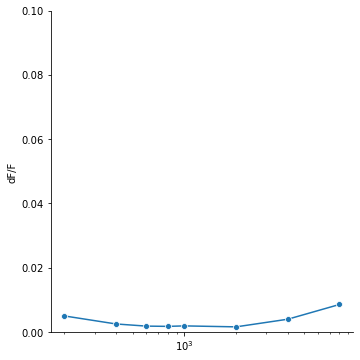

In [9]:
sns.relplot(x=human_df.index, y=human_df['dF/F'], kind='line', marker='o')
plt.ylim([0, 0.1])
plt.xscale('log')

In [10]:
starling_dict = {400:0.023, 800: 0.0125, 1200: 0.007, 1600: 0.006, 3200:0.006, 6400: 0.006} # , 12800: 0.018

In [11]:
starling_df = pd.DataFrame.from_dict(starling_dict, orient='index', columns = ['dF/F'])

In [12]:
combined_df = pd.DataFrame.from_dict(starling_dict, orient='index', columns = ['starling'])
combined_df = pd.concat([combined_df, human_df['dF/F']], axis=1)

In [13]:
combined_df.columns = ['starling', 'human']

In [14]:
combined_df = combined_df.reset_index()

In [15]:
combined_df.rename(columns={'index':'freq'}, inplace=True)

In [16]:
combined_df

,freq,starling,human
0,200,NaN,0.005000
1,400,0.0230,0.002500
2,600,NaN,0.001833
3,800,0.0125,0.001750
4,1000,NaN,0.001900
5,1200,0.0070,NaN
6,1600,0.0060,NaN
7,2000,NaN,0.001600
8,3200,0.0060,NaN
9,4000,NaN,0.003975


In [17]:
combined_df['mel'] = combined_df['freq'].apply(librosa.hz_to_mel) 

In [18]:
combined_df

,freq,starling,human,mel
0,200,NaN,0.005000,3.000000
1,400,0.0230,0.002500,6.000000
2,600,NaN,0.001833,9.000000
3,800,0.0125,0.001750,12.000000
4,1000,NaN,0.001900,15.000000
5,1200,0.0070,NaN,17.651881
6,1600,0.0060,NaN,21.836240
7,2000,NaN,0.001600,25.081880
8,3200,0.0060,NaN,31.918120
9,4000,NaN,0.003975,35.163760


In [19]:
combined_df = combined_df.melt(['freq', 'mel'], ['starling', 'human'], var_name='species', value_name='dF/F').dropna()

In [20]:
combined_df = combined_df.reset_index(drop=True)

In [21]:
combined_df['dF'] = combined_df['freq']*combined_df['dF/F']

In [22]:
combined_df

,freq,mel,species,dF/F,dF
0,400,6.000000,starling,0.023000,9.2
1,800,12.000000,starling,0.012500,10.0
2,1200,17.651881,starling,0.007000,8.4
3,1600,21.836240,starling,0.006000,9.6
4,3200,31.918120,starling,0.006000,19.2
5,6400,42.000000,starling,0.006000,38.4
6,200,3.000000,human,0.005000,1.0
7,400,6.000000,human,0.002500,1.0
8,600,9.000000,human,0.001833,1.1
9,800,12.000000,human,0.001750,1.4


In [23]:
#dmel = hz2mel(df+f)-hz2mel(df)
combined_df['dmel'] = np.array([librosa.hz_to_mel(freq) for freq in (combined_df['freq']+combined_df['dF']).values]) \
- combined_df['mel'].values

In [24]:
combined_df['dmel/mel'] = combined_df['dmel']/combined_df['mel']

In [25]:
combined_df

,freq,mel,species,dF/F,dF,dmel,dmel/mel
0,400,6.000000,starling,0.023000,9.2,0.138000,0.023000
1,800,12.000000,starling,0.012500,10.0,0.150000,0.012500
2,1200,17.651881,starling,0.007000,8.4,0.101461,0.005748
3,1600,21.836240,starling,0.006000,9.6,0.087010,0.003985
4,3200,31.918120,starling,0.006000,19.2,0.087010,0.002726
5,6400,42.000000,starling,0.006000,38.4,0.087010,0.002072
6,200,3.000000,human,0.005000,1.0,0.015000,0.005000
7,400,6.000000,human,0.002500,1.0,0.015000,0.002500
8,600,9.000000,human,0.001833,1.1,0.016500,0.001833
9,800,12.000000,human,0.001750,1.4,0.021000,0.001750


## in frequency domain, sensitivity interval changes as frequency increases

Text(0.5, 6.800000000000011, 'Frequency (Hz)')

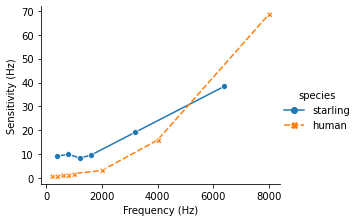

In [40]:
sns.relplot(x='freq', y='dF', style='species', hue='species', data = combined_df, kind='line', markers=True, height=3, aspect=1.3)
plt.ylabel('Sensitivity (Hz)')
plt.xlabel('Frequency (Hz)')
#plt.ylim([0, 0.1])
# plt.xscale('log')
# plt.yscale('log')

## in mel domain, human sensitivity interval stays relatively constant first, but starlings sensitivity interval does not

Text(0.5, 6.800000000000001, 'Frequency (mel)')

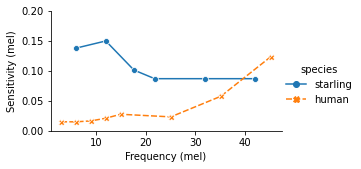

In [39]:
sns.relplot(x='mel', y='dmel', style='species', hue='species', 
            data = combined_df, kind='line', markers=True, height=2.2, aspect=1.8)
# plt.xscale('log')
plt.ylim([0, 0.2])
plt.ylabel('Sensitivity (mel)')
plt.xlabel('Frequency (mel)')

# Ultimately, we want a scale that reflects starling perceptual sensitivity
i.e. sensitivity interval stays constant in most of starling's perceptual frequency range

In [28]:
def hz2star_double(frequencies):
    
    frequencies = np.asanyarray(frequencies)

    # Fill in the linear part
    f_min = 0.0
    f_sp = 200.0 /20

    stars = (frequencies - f_min) / f_sp

    # Fill in the log-scale part

    min_log_hz = 1600.0  # beginning of log region (Hz)
    min_log_star = (min_log_hz - f_min) / f_sp  # same (Mels)
    logstep = np.log(6.4) / 300  # step size for log region

    if frequencies.ndim:
        # If we have array data, vectorize
        log_t = frequencies >= min_log_hz
        stars[log_t] = min_log_star + np.log(frequencies[log_t] / min_log_hz) / logstep
    elif frequencies >= min_log_hz:
        # If we have scalar data, heck directly
        stars = min_log_star + np.log(frequencies / min_log_hz) / logstep

    return stars

In [29]:
combined_df['star'] = combined_df['freq'].apply(hz2star_double) 

In [30]:
combined_df['dstar'] = np.array([hz2star_double(freq) for freq in (combined_df['freq']+combined_df['dF']).values]) \
- combined_df['star'].values

In [31]:
combined_df['d'] = combined_df['dstar'].values.tolist()[:7]+combined_df['dmel'].values.tolist()[7:]

In [32]:
combined_df['scale'] = combined_df['star'].values.tolist()[:7]+combined_df['mel'].values.tolist()[7:]

In [33]:
combined_df

,freq,mel,species,dF/F,dF,dmel,dmel/mel,star,dstar,d,scale
0,400,6.000000,starling,0.023000,9.2,0.138000,0.023000,40.000000,0.920000,0.920000,40.000000
1,800,12.000000,starling,0.012500,10.0,0.150000,0.012500,80.000000,1.000000,1.000000,80.000000
2,1200,17.651881,starling,0.007000,8.4,0.101461,0.005748,120.000000,0.840000,0.840000,120.000000
3,1600,21.836240,starling,0.006000,9.6,0.087010,0.003985,160.000000,0.966774,0.966774,160.000000
4,3200,31.918120,starling,0.006000,19.2,0.087010,0.002726,272.020891,0.966774,0.966774,272.020891
5,6400,42.000000,starling,0.006000,38.4,0.087010,0.002072,384.041781,0.966774,0.966774,384.041781
6,200,3.000000,human,0.005000,1.0,0.015000,0.005000,20.000000,0.100000,0.100000,20.000000
7,400,6.000000,human,0.002500,1.0,0.015000,0.002500,40.000000,0.100000,0.015000,6.000000
8,600,9.000000,human,0.001833,1.1,0.016500,0.001833,60.000000,0.110000,0.016500,9.000000
9,800,12.000000,human,0.001750,1.4,0.021000,0.001750,80.000000,0.140000,0.021000,12.000000


In [34]:
starling_df = combined_df[combined_df['species']=='starling'].reset_index(drop=True)

In [35]:
starling_df['dF_norm'] = starling_df['dF']/starling_df['dF'].mean()
starling_df['dmel_norm'] = starling_df['dmel']/starling_df['dmel'].mean()
starling_df['dstar_norm'] = starling_df['dstar']/starling_df['dstar'].mean()

In [36]:
starling_df

,freq,mel,species,dF/F,dF,dmel,dmel/mel,star,dstar,d,scale,dF_norm,dmel_norm,dstar_norm
0,400,6.000000,starling,0.0230,9.2,0.138000,0.023000,40.000000,0.920000,0.920000,40.000000,0.582278,1.272887,0.975209
1,800,12.000000,starling,0.0125,10.0,0.150000,0.012500,80.000000,1.000000,1.000000,80.000000,0.632911,1.383572,1.060010
2,1200,17.651881,starling,0.0070,8.4,0.101461,0.005748,120.000000,0.840000,0.840000,120.000000,0.531646,0.935856,0.890408
3,1600,21.836240,starling,0.0060,9.6,0.087010,0.003985,160.000000,0.966774,0.966774,160.000000,0.607595,0.802562,1.024791
4,3200,31.918120,starling,0.0060,19.2,0.087010,0.002726,272.020891,0.966774,0.966774,272.020891,1.215190,0.802562,1.024791
5,6400,42.000000,starling,0.0060,38.4,0.087010,0.002072,384.041781,0.966774,0.966774,384.041781,2.430380,0.802562,1.024791


In [37]:
starling_df_melt = pd.melt(starling_df, id_vars=['freq'],  value_vars=['dF_norm', 'dmel_norm', 'dstar_norm'], 
                           var_name='scale', value_name='norm_value')

In [38]:
starling_df_melt

,freq,scale,norm_value
0,400,dF_norm,0.582278
1,800,dF_norm,0.632911
2,1200,dF_norm,0.531646
3,1600,dF_norm,0.607595
4,3200,dF_norm,1.215190
5,6400,dF_norm,2.430380
6,400,dmel_norm,1.272887
7,800,dmel_norm,1.383572
8,1200,dmel_norm,0.935856
9,1600,dmel_norm,0.802562


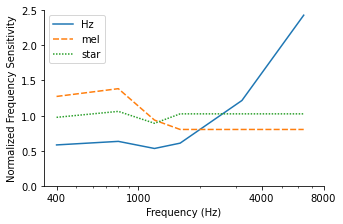

In [39]:
sns.relplot(x='freq', y='norm_value', style='scale', hue='scale', 
            data = starling_df_melt, kind='line', markers=False, legend=False, height=3, aspect=1.5)
plt.ylim([0, 2.5])
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Frequency Sensitivity')
plt.legend(['Hz', 'mel', 'star'])
ax = plt.gca()
ax.set_xticks([400, 1000, 4000, 8000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [40]:
starling_df_melt.groupby('scale')['norm_value'].describe()

,count,mean,std,min,25%,50%,75%,max
scale,,,,,,,,
dF_norm,6.0,1.0,0.744967,0.531646,0.588608,0.620253,1.069620,2.430380
dmel_norm,6.0,1.0,0.261784,0.802562,0.802562,0.869209,1.188629,1.383572
dstar_norm,6.0,1.0,0.060116,0.890408,0.987605,1.024791,1.024791,1.060010


# Let's compare mel and star to frequency domain

In [41]:
freqs = np.arange(0, 15000, 20)

In [42]:
stars = [hz2star_double(freq) for freq in freqs]

In [43]:
hz2star_double(466)

46.6

In [44]:
hz2star_double(523)

52.3

In [45]:
star2hz(250)

13115.674194007483

In [46]:
mels = [librosa.hz_to_mel(freq) for freq in freqs]

Text(0, 0.5, 'mel')

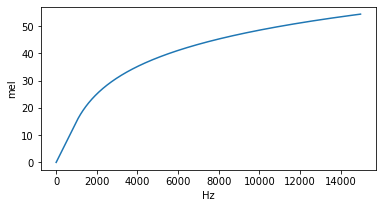

In [47]:
plt.figure(figsize=(6,3))
plt.plot(freqs, mels)
plt.xlabel('Hz')
plt.ylabel('mel')
# plt.xscale('log')

Text(0.5, 1.0, 'Star vs Hz')

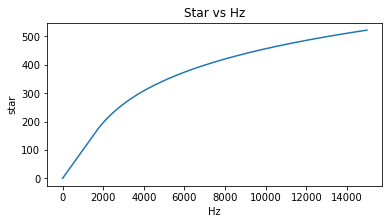

In [48]:
plt.figure(figsize=(6,3))
plt.plot(freqs, stars)
plt.xlabel('Hz')
plt.ylabel('star')
# plt.xscale('log')
plt.title('Star vs Hz')